In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
eps = np.finfo(float).eps
from numpy import log2 as log
%matplotlib inline

In [2]:
# all attributes were transformed despite label
df_transLab = pd.read_csv('./salary_transformed_withLabel.csv', index_col=0) 
df_transLab.head() 

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,13,2,10,5,2,0,0,0,40,5,<=50K


In [3]:
# we see that only salary (our label to be predicted is from type object)
df_transLab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  int64 
 4   occupation      32561 non-null  int64 
 5   relationship    32561 non-null  int64 
 6   race            32561 non-null  int64 
 7   sex             32561 non-null  int64 
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  int64 
 12  salary          32561 non-null  object
dtypes: int64(12), object(1)
memory usage: 3.5+ MB


# Application of DT with pre-set parameters

In [4]:
# Setting the target variable 

X = df_transLab.iloc[:, :-1] # as input variables
y = df_transLab.iloc[:, -1] # as target variable (label)

In [5]:
X

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,13,4,1,1,4,1,2174,0,40,39
1,50,6,13,2,4,0,4,1,0,0,13,39
2,38,4,9,0,6,1,4,1,0,0,40,39
3,53,4,7,2,6,0,2,1,0,0,40,39
4,28,4,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12,2,13,5,4,0,0,0,38,39
32557,40,4,9,2,7,0,4,1,0,0,40,39
32558,58,4,9,6,1,4,4,0,0,0,40,39
32559,22,4,9,4,1,3,4,1,0,0,20,39


In [6]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [7]:
#proportion of class label inputs
df_transLab['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [8]:
#generate training and testing set --> example for split validation
#X as training data and y as label is splitted 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

In [9]:
#check the split sets: proportion 1/3 to 2/3
X_train.shape, X_test.shape

((21815, 12), (10746, 12))

In [10]:
#Decision Tree with Gini Index criterion
# instantiate the DT classifier as dt_gini
# The minimum number of samples required to be at a leaf node.

from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, random_state=0)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [11]:
#Predict the Test set results with criterion gini index
y_pred_gini = dt_gini.predict(X_test)

In [12]:
#comparison of predicted labels y_pred_gini and real test-labels y_test
from sklearn.metrics import accuracy_score

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(y_test, 
                                                                               y_pred_gini)))

The model accuracy with gini index is: 0.8411


In [13]:
#Predict the Train set results with criterion gini index

y_pred_train_gini = dt_gini.predict(X_train)
y_pred_train_gini

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [14]:
#Comparison of test and training score 
#there is no sign of overfitting until now ... we will later on try apply cross-validation

print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 0.8393
Test set score: 0.8411


[Text(0.5, 0.875, 'relationship <= 0.5\ngini = 0.367\nsamples = 21815\nvalue = [16524, 5291]\nclass = >50K'),
 Text(0.25, 0.625, 'education-num <= 12.5\ngini = 0.495\nsamples = 8887\nvalue = [4885, 4002]\nclass = >50K'),
 Text(0.125, 0.375, 'capital-gain <= 5095.5\ngini = 0.442\nsamples = 6177\nvalue = [4136, 2041]\nclass = >50K'),
 Text(0.0625, 0.125, 'gini = 0.417\nsamples = 5868\nvalue = [4129, 1739]\nclass = >50K'),
 Text(0.1875, 0.125, 'gini = 0.044\nsamples = 309\nvalue = [7, 302]\nclass = <=50K'),
 Text(0.375, 0.375, 'capital-gain <= 5095.5\ngini = 0.4\nsamples = 2710\nvalue = [749, 1961]\nclass = <=50K'),
 Text(0.3125, 0.125, 'gini = 0.438\nsamples = 2309\nvalue = [747, 1562]\nclass = <=50K'),
 Text(0.4375, 0.125, 'gini = 0.01\nsamples = 401\nvalue = [2, 399]\nclass = <=50K'),
 Text(0.75, 0.625, 'capital-gain <= 7073.5\ngini = 0.18\nsamples = 12928\nvalue = [11639, 1289]\nclass = >50K'),
 Text(0.625, 0.375, 'relationship <= 4.5\ngini = 0.146\nsamples = 12632\nvalue = [11630, 10

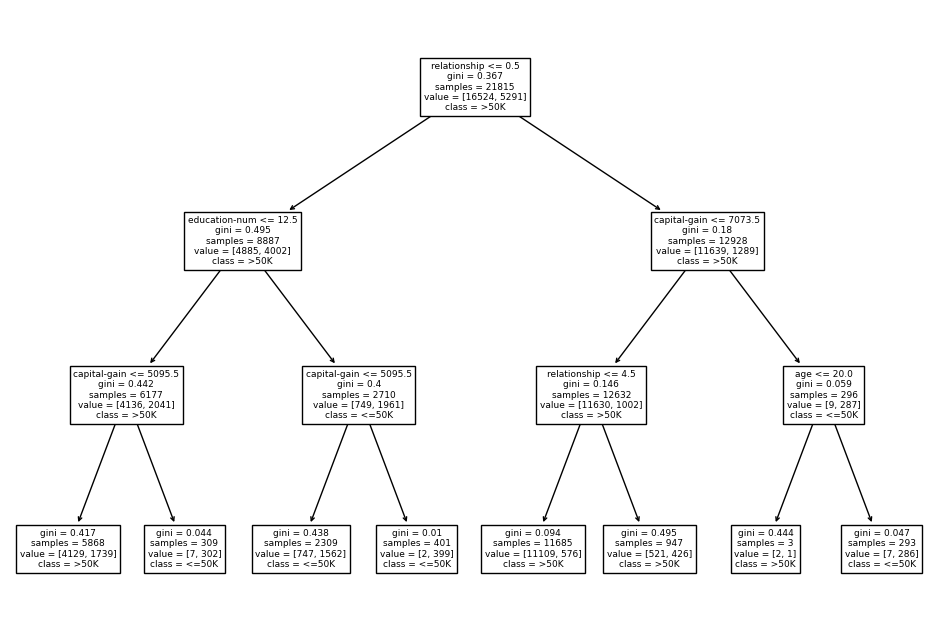

In [15]:
#visusaliation of the gini-based DT based on training data

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, y_train), feature_names=['age', 'workclass', 
                                                             'education-num', 
                                                             'marital-status', 
                                                             'occupation', 
                                                             'relationship', 
                                                             'race', 
                                                             'sex', 
                                                             'capital-gain', 
                                                             'capital-loss', 
                                                             'hours-per-week', 
                                                             'native-country'], 
               class_names=['>50K','<=50K']) 

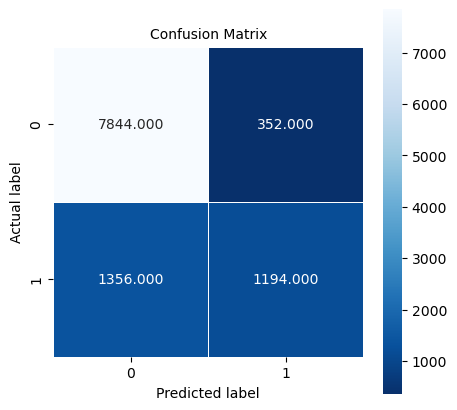

In [16]:
#Alternative for displaying confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, 
            cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);

In [17]:
#Classification Report, by considering the most import metrics for classification
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

       <=50K       0.85      0.96      0.90      8196
        >50K       0.77      0.47      0.58      2550

    accuracy                           0.84     10746
   macro avg       0.81      0.71      0.74     10746
weighted avg       0.83      0.84      0.83     10746



# Overfitting via Cross-Validation

In [18]:
#Cross-Validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree

#10-fold cross-validation
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [19]:
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                                    max_depth=3, min_samples_split=2, 
                                 min_samples_leaf=1, random_state=42), X, y, cv= kf, 
                        scoring="accuracy")

print(f'Accuracy scores for each fold are: {score}')
print(f'Average accuracy score: {"{:.2f}".format(score.mean())}')

Accuracy scores for each fold are: [0.84494934 0.83814496 0.84121622 0.83046683 0.83998771 0.84121622
 0.84183047 0.83568796 0.84244472 0.84275184]
Average accuracy score: 0.84


In [20]:
#Example for tuning the DT paramters
#no-pre-setted variables
#students can check different combinations and determine the best possible alternative

#for PdA: Alternative with GridSearch

max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, 
                                                        random_state= 42), 
                            X, y, cv= kf, scoring="accuracy")
    print(f'Average accuracy score({val}): {"{:.3f}".format(score.mean())}')

Average accuracy score(1): 0.759
Average accuracy score(2): 0.826
Average accuracy score(3): 0.840
Average accuracy score(4): 0.846
Average accuracy score(5): 0.851
Average accuracy score(6): 0.853
Average accuracy score(7): 0.856
Average accuracy score(8): 0.855
Average accuracy score(9): 0.853
Average accuracy score(10): 0.855


# DT without Paramters to show the need of Prunin

In [21]:
#DT version without setting parameters
# danger of getting a too specified tree
#dt_noparam is the tree without pre-set paramters

dt_noparam = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
dt_noparam.fit(X_train, y_train)

#Predict the Test set results with criterion gini index
y_pred = dt_noparam.predict(X_test)

print('The model accuracy with gini index is: {0:0.4f}'. format(accuracy_score(y_test, 
                                                                               y_pred)))

The model accuracy with gini index is: 0.8110


[Text(0.722160604570221, 0.9868421052631579, 'relationship <= 0.5\ngini = 0.367\nsamples = 21815\nvalue = [16524, 5291]\nclass = >50K'),
 Text(0.5057016623425432, 0.9605263157894737, 'education-num <= 12.5\ngini = 0.495\nsamples = 8887\nvalue = [4885, 4002]\nclass = >50K'),
 Text(0.3833236595982559, 0.9342105263157895, 'capital-gain <= 5095.5\ngini = 0.442\nsamples = 6177\nvalue = [4136, 2041]\nclass = >50K'),
 Text(0.2922984678716545, 0.9078947368421053, 'capital-loss <= 1782.5\ngini = 0.417\nsamples = 5868\nvalue = [4129, 1739]\nclass = >50K'),
 Text(0.11471709409235369, 0.881578947368421, 'education-num <= 7.5\ngini = 0.402\nsamples = 5640\nvalue = [4066, 1574]\nclass = >50K'),
 Text(0.02811326683532881, 0.8552631578947368, 'occupation <= 11.5\ngini = 0.179\nsamples = 874\nvalue = [787, 87]\nclass = >50K'),
 Text(0.01886303452202545, 0.8289473684210527, 'occupation <= 4.5\ngini = 0.151\nsamples = 703\nvalue = [645, 58]\nclass = >50K'),
 Text(0.011986292172250243, 0.8026315789473685,

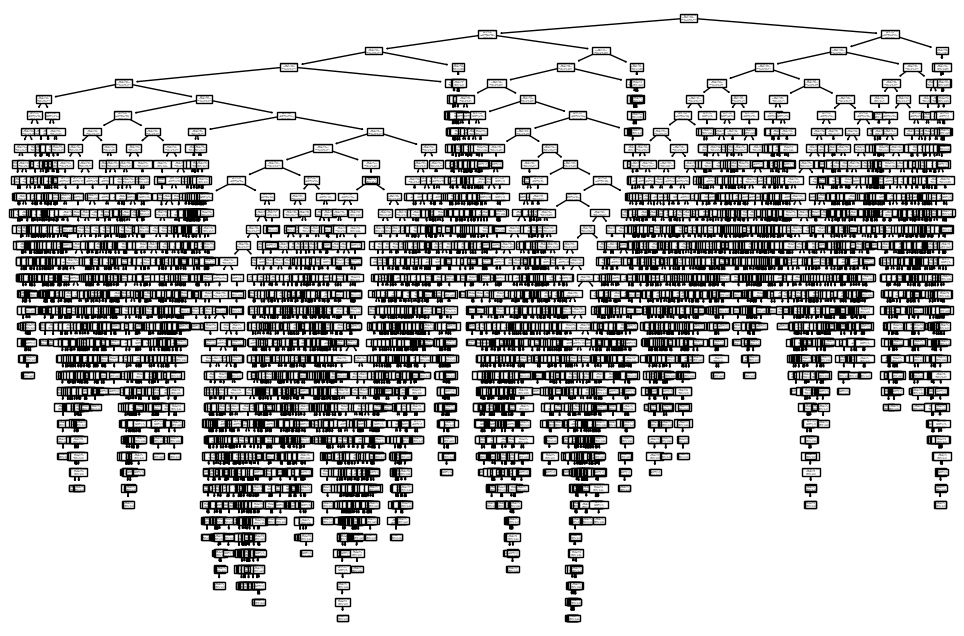

In [22]:
# hier stehengeblieben, durchwachsenen Baum und dann prunen
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_noparam.fit(X_train, y_train), feature_names=['age', 
                                                                'workclass', 
                                                             'education-num', 
                                                                'marital-status', 
                                                             'occupation', 
                                                                'relationship', 
                                                                'race', 
                                                             'sex', 
                                                                'capital-gain', 
                                                                'capital-loss', 
                                                             'hours-per-week', 
                                                                'native-country'], 
               class_names=['>50K','<=50K'])

# Pruning to optimise DT

In [23]:
#Pruning: stoping the growth of decision tree on an early stage. 
#For that we can limit the growth of trees by setting constrains.

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#We can limit parameters like max_depth , min_samples etc.
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

#tree to be tuned without paramters
clf = tree.DecisionTreeClassifier()

gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [24]:
gcv.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}

Test score 0.8534338358458962


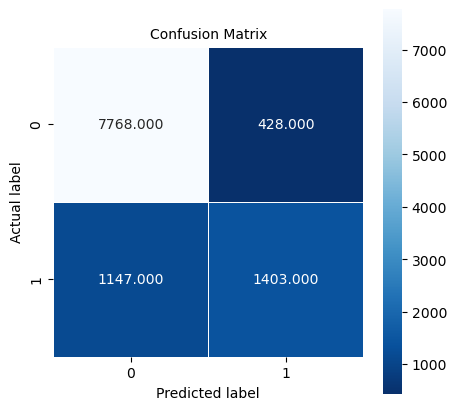

In [25]:
#gcv is the pruning function 
#accuracy result shows better results

model = gcv.best_estimator_
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);

print(f'Test score {accuracy_score(y_test_pred,y_test)}')

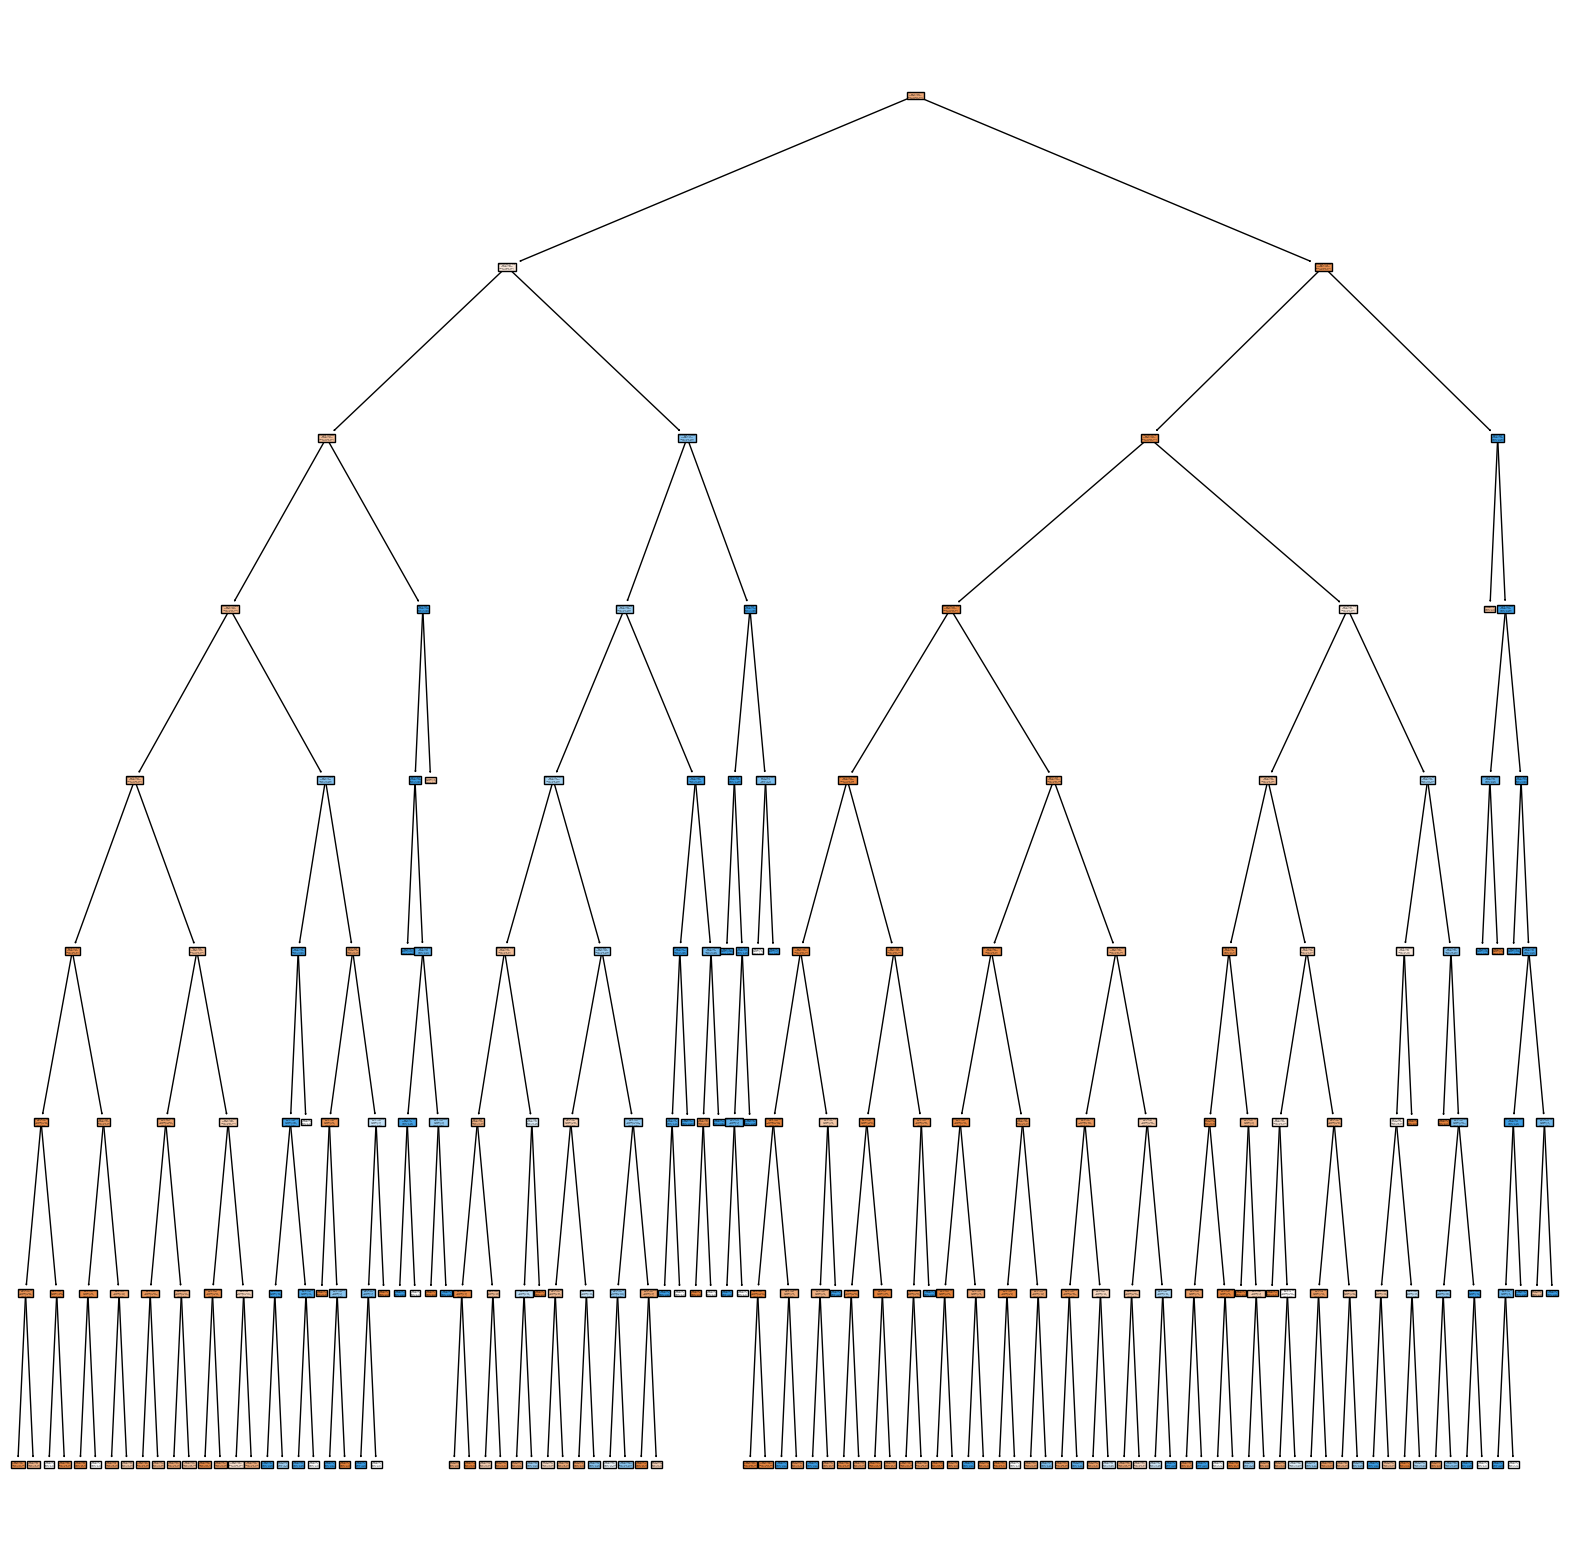

In [26]:
#Plot pruned Decision Tree (see model)
# we can see from the result how the tree was pruned

plt.figure(figsize=(20,20))

tree.plot_tree(model,feature_names=['age', 'workclass','education-num', 'marital-status',  
                                    'occupation', 'relationship', 'race', 'sex', 
                                    'capital-gain', 'capital-loss', 'hours-per-week', 
                                    'native-country'], class_names=['>50K','<=50K'], 
               filled=True)

plt.show()



In [27]:
text_representation = tree.export_text(model, feature_names=['age', 'workclass', 
                                                             'education-num', 
                                                             'marital-status',  
                                                             'occupation', 
                                                             'relationship', 
                                                             'race', 
                                                             'sex', 
                                                             'capital-gain', 
                                                             'capital-loss', 
                                                             'hours-per-week', 
                                                             'native-country'])
print(text_representation)

|--- relationship <= 0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- capital-loss <= 1782.50
|   |   |   |   |--- education-num <= 7.50
|   |   |   |   |   |--- occupation <= 11.50
|   |   |   |   |   |   |--- occupation <= 4.50
|   |   |   |   |   |   |   |--- occupation <= 3.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |   |--- occupation >  3.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |--- occupation >  4.50
|   |   |   |   |   |   |   |--- workclass <= 1.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |   |--- workclass >  1.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |--- occupation >  11.50
|   |   |   |   |   |   |--- age <= 45.50
|   |   |   |   |   |   |   |--- hours-per-week <= 67.50
|   |   |   |   |   |   |   |   |--- class:  <=50K
|   |   |   |   |   |   |   |--- hours-per-week >  67.50
|   |   |   |   | 